<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/kakei/family_budget/kakei_chosa_prepro_to_dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 家計調査データの分析

## データの紹介

- [独立行政法人 統計センター 一般用ミクロデータ 平成21年全国消費実態調査 （十大費目）](https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_2009zensho.zip) https://www.nstac.go.jp/services/ippan-microdata.html
- [独立行政法人 統計センター 一般用ミクロデータ 平成21年全国消費実態調査 （詳細品目）](https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_2009zensho_s.zip) https://www.nstac.go.jp/services/ippan-microdata.html
- [独立行政法人 統計センター 一般用ミクロデータ 就業構造基本調査 （平成４年～24年）](https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_shugyou.zip) https://www.nstac.go.jp/services/ippan-microdata.html

## 課題1

https://www.nstac.go.jp/services/ippan-microdata.html

をクリックし、ippan_2009zensho.zip と ippan_2009zensho_s.zip がどのように異なるか見てみましょう。

## データの取得と解凍

!の後にLinuxコマンドを書くとそのセルの命令はPythonプログラムではなくLinuxのコマンドとして実行されます。

wget はデータをダウンロードするのに使うことができるLinuxのコマンドです。

In [1]:
!wget https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_2009zensho_s.zip

--2020-08-22 05:11:09--  https://github.com/hannari-python/tutorial/raw/master/data/ippan-microdata/ippan_2009zensho_s.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hannari-python/tutorial/master/data/ippan-microdata/ippan_2009zensho_s.zip [following]
--2020-08-22 05:11:10--  https://raw.githubusercontent.com/hannari-python/tutorial/master/data/ippan-microdata/ippan_2009zensho_s.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33090889 (32M) [application/zip]
Saving to: ‘ippan_2009zensho_s.zip’

ippan_2009zensho_s. 100%[===================>]  31.56M  39.7MB/s    in 0.8s    

2020-08-22 05:11

unzip を zip ファイルを解凍する Linux コマンドです。

In [2]:
!unzip /content/ippan_2009zensho_s.zip

Archive:  /content/ippan_2009zensho_s.zip
  inflating: ippan_2009zensho_s/ippan_2009zensho_s.xls  
  inflating: ippan_2009zensho_s/ippan_2009zensho_s_dataset.csv  


## 課題2

- `ippan_2009zensho_s_dataset.csv` の何行目からが表データのスタートか見てみましょう
- `ippan_2009zensho_s.xls` をGoogle Sheetsにインポートしてデータの定義を見てみましょう
- データの内どの部分が必要なデータか考えてみましょう


## 分析に必要なPythonパッケージのインストール

pip はPythonのパッケージをインストールするためのコマンドです。
空白を間にはさみ複数のパッケージを連続して書くとそれらがすべてインストールされます。

dashはダッシュボードのWebアプリケーションを構築するためのフレームワークタイプのPythonパッケージです。

jupyter_dashはJupyter Notebookでdashを使うためのPythonパッケージです。

plotlyはオープンソースのインタラクティブなグラフライブラリのPythonパッケージです。

colabには最初からplotlyがインストールされていますが最新版を使うために下記では`--upgrade`オプションをつけインストールし直しています。

In [3]:
!pip install dash jupyter_dash 
!pip install --upgrade plotly

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 1.2MB 8.9MB/s 
     |████████████████████████████████| 3.4MB 25.5MB/s 
     |████████████████████████████████| 194kB 42.7MB/s 
     |████████████████████████████████| 1.8MB 36.8MB/s 
     |████████████████████████████████| 358kB 45.7MB/s 
  Created wheel for dash: filename=dash-1.14.0-cp36-none-any.whl size=80129 sha256=3cbe8d9b95d34c4954baf76b4740f83d3c1837af8a3d1033db2a46bba8b0feaa
  Stored in directory: /root/.cache/pip/wheels/1d/54/0b/e846f762d47e8abc9234419822d013dfb2ccf957b48e411dc6
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273 sha256=3a18efa29a55eaeba24533d0b8af35861c085743949f9aa28a4c4715897d1e1b
  Stored in directory: /root/.cache/pip/wheels/f7/e9/e4/5afc286be7c87461375e33152558415dfeb0c8f5af3b50e742
  Created wheel for dash-renderer: filename=dash_renderer-1.6.0-cp36-none-any.whl siz

pandasはテーブル形式のデータを簡単かつ直感的に操作できるように「データフレーム」というデータ構造を提供してくれるPythonパッケージです。

下記では `s` がその「データフレーム」になります。

In [4]:
import pandas as pd

In [5]:
s = pd.read_csv('/content/ippan_2009zensho_s/ippan_2009zensho_s_dataset.csv', encoding='shift_jis', header=8)

## 課題3
- `encoding` オプションを付けないと`s`がどうなるか確認しましょう
- `header` オプションを付けないと`s`がどうなるか確認しましょう
- `header` オプションの数値を変えると`s`がどうなるか確認しましょう
- `skiprows` というオプションの効果も試してみましょう

## データフレームとは

ここで `s` のデータ構造はデータフレームと呼ばれます。
データフレームとはとりあえずテーブルデータを保持するためのデータ構造と考えていただけばOKです。
`s`とだけ書いたセルをそのまま実行するとデータの内容を見ることができます。

## 課題4

- `ippan_2009zensho_s.xls` を Google Sheets で開いて、データ行列の定義を確認しましょう。

In [6]:
s

,3City,T_SeJinin,T_SyuJinin,T_JuSyoyu,T_Syuhi,T_Age_5s,T_Age_65,Weight,Y_Income,L_Expenditure,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure,E001,E002,E003,E004,E005,E006,E007,E008,E009,E010,E011,E012,E013,E014,E015,E016,E017,E018,E019,E020,...,E371,E372,E373,E374,E375,E376,E377,E378,E379,E380,E381,E382,E383,E384,E385,E386,E387,E388,E389,E390,E391,E392,E393,E394,E395,E396,E397,E398,E399,E400,E401,E402,E403,E404,E405,E406,E407,E408,E409,E410
0,1,2,1,1,1,1,1,895.266667,3917,201649,47756,16028,9652,6702,8088,726,21546,0,14433,76719,47756,4574,1728,1557,1027,262,3450,2070,555,393,432,3722,2882,785,1286,621,64,126,840,636,...,1320,2186,6448,138,512,535,582,277,4404,2885,65,939,1089,224,538,31,2240,18347,1185,57,5425,244,284,9490,231,95,182,1154,17820,15248,2572,24149,19000,5149,417,3591,1141,576,186,390
1,1,2,1,1,1,1,1,895.266667,6675,166381,34054,7416,26313,17062,6989,7637,20773,0,19048,27089,34054,2813,1019,1050,489,254,1863,905,564,132,261,2432,2112,632,621,697,23,139,320,203,...,231,668,1677,21,258,100,78,38,1182,1581,26,899,189,161,291,14,656,5794,229,10,3980,49,96,804,96,32,95,404,7335,6811,523,8710,7687,1023,239,437,348,282,94,188
2,1,2,1,1,1,1,1,895.266667,6706,259736,84501,1927,10082,6741,5090,11015,53372,0,17289,69719,84501,5004,657,1122,3067,158,7010,4216,718,836,1239,7742,5284,3382,1136,628,43,95,2458,2248,...,4942,3637,8037,190,1210,1606,423,557,4050,8032,124,3204,3350,316,1007,30,1096,20994,1447,40,4398,497,258,9418,295,75,121,4445,9115,8095,1021,11933,7405,4529,1166,2705,658,429,183,246
3,1,2,1,1,1,1,1,895.266667,2790,114511,41664,730,22358,5413,1205,5049,17411,0,8605,12077,41664,4372,1785,1474,910,202,3680,2713,363,255,349,3093,2512,925,828,565,45,149,581,383,...,306,113,2073,36,116,202,109,56,1554,487,18,116,147,45,146,14,182,1661,45,3,157,349,63,667,34,6,24,314,2692,2291,401,4136,2644,1492,69,977,445,205,55,151
4,1,2,1,1,1,1,1,895.266667,2577,193505,56981,3779,28747,4812,4243,751,16435,0,38231,39527,56981,4957,1463,1463,1763,268,4712,3181,558,413,560,4644,3726,1310,1682,518,87,129,919,637,...,842,699,7654,46,160,131,612,93,6613,1780,7,643,870,170,82,8,1116,4768,280,22,2000,164,50,1347,17,96,133,660,5131,3859,1272,16907,4840,12068,699,10940,428,445,138,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45806,0,3,2,2,2,0,2,552.266667,4398,216774,46169,39809,32508,2896,4203,18778,21739,30,4315,46326,46169,5207,2668,1391,913,235,4929,3086,810,515,518,3851,3055,1001,1263,607,64,119,797,604,...,1022,1163,3508,82,243,280,362,165,2376,1196,40,576,276,67,193,45,1122,12331,1560,291,728,1149,292,6481,243,48,904,634,10563,7368,3194,12858,10883,1975,175,1076,724,1817,957,860
45807,0,3,2,2,2,0,2,552.266667,4844,165978,52670,37839,25403,3532,2293,7016,5022,8,12656,19540,52670,5932,3008,1602,1051,271,5653,3556,927,578,593,4410,3527,1164,1477,680,71,134,883,669,...,408,335,1003,43,200,128,150,76,406,527,19,231,172,20,68,16,516,3927,727,82,125,888,81,1493,115,18,191,208,6634,5082,1552,5104,4120,984,89,523,372,769,363,406
45808,0,3,2,2,2,0,2,552.266667,4630,244064,53784,76871,18196,17747,3308,13499,27705,25,4309,28619,53784,6033,3086,1614,1052,280,5761,3633,932,596,599,4503,3581,1184,1485,700,75,138,922,707,...,626,757,2547,41,121,227,423,104,1630,936,26,282,295,38,266,29,402,6524,847,117,300,812,186,3022,187,38,608,408,6198,3433,2765,8804,7553,1251,190,699,362,1431,973,457
45809,0,3,2,2,2,0,2,552.266667,6738,399003,123080,38810,19711,2816,5666,21831,23914,28,58844,104302,123080,13423,6772,3770,2247,634,13315,8362,2196,1353,1405,10379,8271,2713,3424,1644,174,316,2108,1603,...,2179,2480,7502,198,515,597,772,353,5066,2641,85,1228,606,119,508,95,2025,26762,3328,817,1364,3160,624,13367,517,102,1928,1554,27466,16321,11145

## データフレームの列の選択

`s` のうち `OL_Expenditure`までの列を選択し、細かい分類の支出情報の列を取り除いてみましょう。
そのためにはデータフレームの `loc` メソッドを使います。

In [7]:
data = s.loc[:, :'OL_Expenditure']
data

,3City,T_SeJinin,T_SyuJinin,T_JuSyoyu,T_Syuhi,T_Age_5s,T_Age_65,Weight,Y_Income,L_Expenditure,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure
0,1,2,1,1,1,1,1,895.266667,3917,201649,47756,16028,9652,6702,8088,726,21546,0,14433,76719
1,1,2,1,1,1,1,1,895.266667,6675,166381,34054,7416,26313,17062,6989,7637,20773,0,19048,27089
2,1,2,1,1,1,1,1,895.266667,6706,259736,84501,1927,10082,6741,5090,11015,53372,0,17289,69719
3,1,2,1,1,1,1,1,895.266667,2790,114511,41664,730,22358,5413,1205,5049,17411,0,8605,12077
4,1,2,1,1,1,1,1,895.266667,2577,193505,56981,3779,28747,4812,4243,751,16435,0,38231,39527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45806,0,3,2,2,2,0,2,552.266667,4398,216774,46169,39809,32508,2896,4203,18778,21739,30,4315,46326
45807,0,3,2,2,2,0,2,552.266667,4844,165978,52670,37839,25403,3532,2293,7016,5022,8,12656,19540
45808,0,3,2,2,2,0,2,552.266667,4630,244064,53784,76871,18196,17747,3308,13499,27705,25,4309,28619
45809,0,3,2,2,2,0,2,552.266667,6738,399003,123080,38810,19711,2816,5666,21831,23914,28,58844,104302


## [記述統計量(英: descriptive statistics value)](https://ja.wikipedia.org/wiki/%E8%A6%81%E7%B4%84%E7%B5%B1%E8%A8%88%E9%87%8F) の確認

記述統計量を確認しデータの範囲や代表的な値がどの程度か確認しましょう。
そのためにはデータフレームの `describe` メソッドを使います。


In [8]:
data.describe()

,3City,T_SeJinin,T_SyuJinin,T_JuSyoyu,T_Syuhi,T_Age_5s,T_Age_65,Weight,Y_Income,L_Expenditure,Food,Housing,LFW,Furniture,Clothes,Health,Transport,Education,Recreation,OL_Expenditure
count,45811.000000,45811.00000,45811.000000,45811.000000,45811.000000,45811.000000,45811.000000,45811.000000,45811.000000,4.581100e+04,45811.000000,4.581100e+04,45811.000000,45811.000000,45811.000000,45811.000000,4.581100e+04,4.581100e+04,4.581100e+04,4.581100e+04
mean,0.400559,2.61291,1.489904,1.176966,1.250289,4.200214,1.291480,693.326887,6401.920652,2.983737e+05,68740.210364,1.612791e+04,19420.995569,9373.956342,12054.818668,13280.968850,4.469237e+04,1.501489e+04,3.109929e+04,6.856828e+04
std,0.490017,0.48709,0.499904,0.381644,0.433184,3.137751,0.454449,161.527843,3810.787269,1.649328e+05,29209.813101,3.878798e+04,8246.369457,12941.144209,15069.659817,18928.182013,7.738839e+04,4.417047e+04,3.289503e+04,8.456648e+04
min,0.000000,2.00000,1.000000,1.000000,1.000000,0.000000,1.000000,510.050847,366.000000,4.208400e+04,9737.000000,0.000000e+00,1632.000000,27.000000,64.000000,45.000000,7.800000e+01,0.000000e+00,3.720000e+02,3.450000e+02
25%,0.000000,2.00000,1.000000,1.000000,1.000000,0.000000,1.000000,566.503597,3805.000000,1.942165e+05,48104.500000,6.590000e+02,13589.500000,2877.500000,3893.500000,3849.000000,1.037250e+04,0.000000e+00,1.218200e+04,2.479300e+04
50%,0.000000,3.00000,1.000000,1.000000,1.000000,4.000000,1.000000,594.246377,5504.000000,2.602560e+05,63498.000000,2.877000e+03,17905.000000,5614.000000,7686.000000,7687.000000,2.346500e+04,1.761000e+03,2.170800e+04,4.463400e+04
75%,1.000000,3.00000,2.000000,1.000000,2.000000,7.000000,2.000000,811.616592,7983.500000,3.549910e+05,83502.000000,1.746200e+04,23544.500000,11058.000000,14515.500000,15434.500000,4.876050e+04,1.353500e+04,3.831100e+04,8.090950e+04
max,1.000000,3.00000,2.000000,2.000000,2.000000,9.000000,2.000000,1365.894737,67394.000000,3.161852e+06,394347.000000,1.702352e+06,128725.000000,584980.000000,569141.000000,715039.000000,2.306300e+06,2.711758e+06,1.019545e+06,2.133987e+06


## 支出カテゴリ毎の支出金額の分布の比較

In [ ]:
!pip install joypy

## ニクラス分類

家計の情報から三大都市圏に住んでいるかどうかを予測する問題を考えます。

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix

### 前処理

#### 目的変数と説明変数の取得

In [15]:
y = s["3City"].values
print(type(y), y.shape)
print(np.unique(y))

<class 'numpy.ndarray'> (45811,)
[0 1]


三大都市圏のサンプル数の比率は40%です。今はニクラス分類問題を考えているので、ランダムに予測をしても40%の確率で正解します。

In [16]:
np.sum(y == 1) / len(y)

0.4005588177511951

説明変数として収入と支出を

In [17]:
X = s.loc[:, "Y_Income":"OL_Expenditure"]
type(X), X.shape

(pandas.core.frame.DataFrame, (45811, 12))

#### データを訓練用とテスト用に分割

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 予測モデルの訓練と評価

* Linear SVM
  * Y_Incomeを説明変数とする


#### 線形SVM

In [19]:
clf = LinearSVC()
clf.fit(X_train.to_numpy(), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [20]:
clf.score(X_train.to_numpy(), y_train)

0.4239728928420161

In [21]:
clf.score(X_test.to_numpy(), y_test)

0.42783436962561183

#### 非線形SVM（ガウスカーネル）

線形SVMと比べて少し時間がかかります。

In [22]:
clf = SVC()
clf.fit(X_train.to_numpy(), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

Score (train): 0.6255497996285798
Score (test): 0.6158883450191824


In [24]:
print(clf.score(X_test.to_numpy(), y_test))

0.6158883450191824


##### ハイパーパラメータ

* C: float, default=1.0 
  * Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
* kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
  * Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


In [25]:
clf = SVC(C=0.1)
clf.fit(X_train.to_numpy(), y_train)
print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

Score (train): 0.6187730101326036
Score (test): 0.6111258102923667


In [26]:
clf = SVC(C=10.0)
clf.fit(X_train.to_numpy(), y_train)
print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

Score (train): 0.6340859479360115
Score (test): 0.6208493186929488


### ランダムフォレスト

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train.to_numpy(), y_train)
print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

Score (train): 1.0
Score (test): 0.6336817039290912


### 勾配ブースティング

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train.to_numpy(), y_train)
print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

Score (train): 0.6660476330107842
Score (test): 0.6434713586453235


### スケーリング

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled, y_train)
print("Score (train): {}".format(clf.score(X_train_scaled, y_train)))
print("Score (test): {}".format(clf.score(X_test_scaled, y_test)))

Score (train): 0.6660476330107842
Score (test): 0.6434713586453235


## 多クラス分類

### 前処理

#### 目的変数の取得

In [27]:
y = s["T_Age_5s"].values
print(type(y), y.shape)
print(np.unique(y))

<class 'numpy.ndarray'> (45811,)
[0 1 2 3 4 5 6 7 8 9]


各クラスのサンプル数を確認します。

In [28]:
np.histogram(y, bins=np.arange(10))

(array([11466,  1068,  2602,  4008,  4209,  4168,  4523,  5156,  8611]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

比率に直すと次のようになります。

In [29]:
np.set_printoptions(precision=3)
np.histogram(y, bins=np.arange(10))[0] / len(y)

array([0.25 , 0.023, 0.057, 0.087, 0.092, 0.091, 0.099, 0.113, 0.188])

#### データを訓練用とテスト用に分割

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 予測モデルの訓練と評価

#### 勾配ブースティング

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train.to_numpy(), y_train)
print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

Score (train): 0.47027009415827714
Score (test): 0.3987299907395158


#### 混同行列

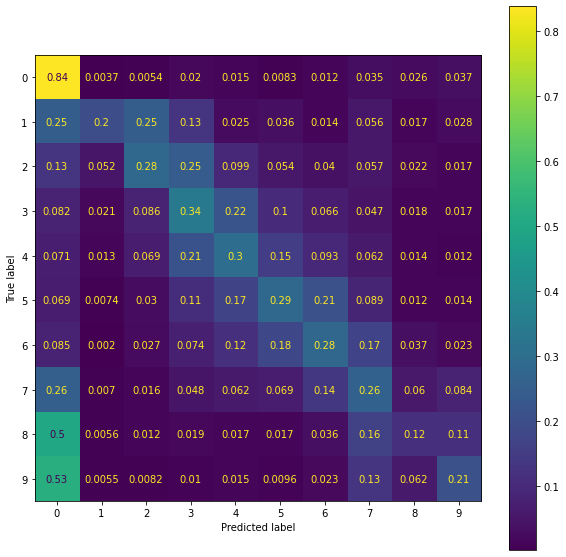

In [ ]:
fig = plt.figure(figsize=(10, 10))
disp = plot_confusion_matrix(clf, X_test.to_numpy(), y_test,
                                #  display_labels=class_names,
                                #  cmap=plt.cm.Blues)
                                normalize="true", ax=plt.gca())
plt.show()

#### サンプルバランス補正

In [ ]:
clf = SVC(C=10.0, class_weight="balanced")
clf.fit(X_train.to_numpy(), y_train)
print("Score (train): {}".format(clf.score(X_train.to_numpy(), y_train)))
print("Score (test): {}".format(clf.score(X_test.to_numpy(), y_test)))

Score (train): 0.3474733652624377
Score (test): 0.3270935308903294


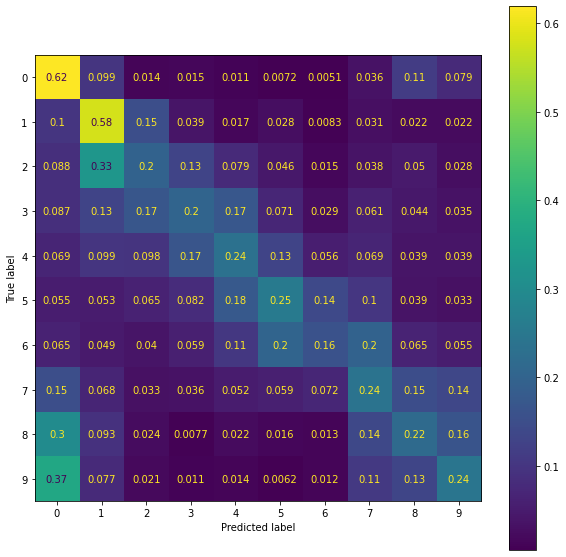

In [ ]:
fig = plt.figure(figsize=(10, 10))
disp = plot_confusion_matrix(clf, X_test.to_numpy(), y_test,
                                #  display_labels=class_names,
                                #  cmap=plt.cm.Blues)
                                normalize="true", ax=plt.gca())
plt.show()

### 特徴量の工夫（うまく行ったら本番でも使用）

In [ ]:
X2 = X.to_numpy()
X2 = X2 / X2.sum(axis=1).reshape((-1, 1))

In [ ]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [ ]:
clf = SVC(C=10.0, class_weight="balanced")
clf.fit(X2_train, y_train)
print("Score (train): {}".format(clf.score(X2_train, y_train)))
print("Score (test): {}".format(clf.score(X2_test, y_test)))

Score (train): 0.32235363112110255
Score (test): 0.31994972880010586


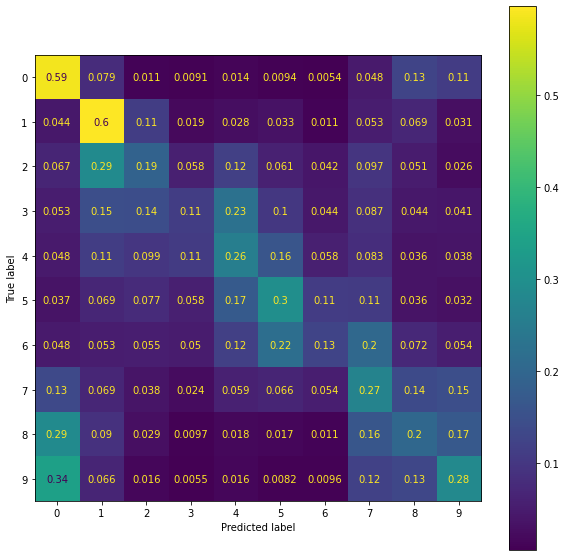

In [ ]:
fig = plt.figure(figsize=(10, 10))
disp = plot_confusion_matrix(clf, X2_test, y_test,
                                #  display_labels=class_names,
                                #  cmap=plt.cm.Blues)
                                normalize="true", ax=plt.gca())
plt.show()

## plotly (express) を用いた可視化

ここでは ... を可視化してみましょう。

In [ ]:
import plotly.express as px

In [ ]:
px.violin(data, y=data.columns)

In [ ]:
px.histogram(data, x='Y_Income', histnorm='percent', nbins=100)

In [ ]:
data_bins = pd.cut(data['Y_Income'].values, bins=10)

In [ ]:
data_bins

# ↑いまいちなビン作り・・・
# ↓自作bin作成

In [ ]:
bin_image = [0, 2000, 4000, 6000, 8000, 12000, 20000]

In [ ]:
bin_image

In [ ]:
import numpy as np

In [ ]:
bin_image = [0, 2000, 4000, 6000, 8000, 12000, 20000]
bin_array = np.digitize(data['Y_Income'], bin_image)

In [ ]:
cont = pd.read_excel("/content/ippan_2009zensho_s/ippan_2009zensho_s.xls")

In [ ]:
cont[:50]

## 各消費分類の消費支出に対する割合を作成する

In [ ]:
data_test = data.loc[: ,'L_Expenditure':'OL_Expenditure']

In [ ]:
data_test

In [ ]:
data_test.apply(lambda x: x/ data_test['L_Expenditure'])

In [ ]:
data_expenditure_ratio = data_test.apply(lambda x: x / data_test['L_Expenditure'])
data_front = data.loc[:, :'Y_Income']

In [ ]:
px.violin(data_expenditure_ratio, x=data_expenditure_ratio.columns[1:])

In [ ]:
data_front = data_front.drop('Weight',axis=1)

In [ ]:
data_preped = pd.concat([data_front, data_expenditure_ratio], axis=1)

In [ ]:
data_preped

In [ ]:
bin_image = [0, 2000, 4000, 6000, 8000, 12000, 20000]
bin_array = np.digitize(data['Y_Income'], bin_image)
data_preped['bins'] = bin_array

In [ ]:
data_preped

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

for num in data_preped.bins.unique():
  data_preped_num = data_preped[data_preped['bins'] == num]
  fig.add_trace(go.Histogram(x=data_preped_num['Food'], name=f'{num}', histnorm='probability', nbinsx=20))

fig.show()

## どんな可視化をするか？

- ビンの個数を動かせる
- ビンの数値を変更できる
- それをヒストグラムで描画できる

In [ ]:
data_for_dash = data_preped.drop('bins', axis=1)

In [ ]:
from jupyter_dash import JupyterDash 
import dash_core_components as dcc 
import dash_html_components as html 

from dash.dependencies import Input, Output, State, ALL

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
                       

                       html.Button(id='my_button', children='Add Input'),
                      
                      html.Div([
                       html.Div([
                       html.Div(id='input_zone', children=[]),
                      ], style={'width': '25%', 'display': 'inline-block', 'verticalAlign': 'top'}),
                       


                       html.Div([
                                 dcc.Dropdown(id='my_dropdown',
                                              options=[{'label': col, 'value': col} for col in data_for_dash.columns],
                                              value='Food'
                                              ),
                                 dcc.Graph(id='my_graph'),
                                
                                html.Div([
                                 html.H3('Histogram Bin Num: '),
                                 dcc.Input(id='bin_num', value=10, type='number'),
                                ]),
                       ], style={'width': '70%', 'display': 'inline-block'}),
                      ]),
                       
                       html.Div([
                       dcc.RangeSlider(id='my_range_slider',
                                       min=0,
                                       max=data_for_dash['Y_Income'].max()
                                       
                                       ),
                        html.Button(id='slider_button', children='graph update'),
                       ], style={'width': '90%', 'height': 100, 'margin': 'auto'}),

])

@app.callback(Output('input_zone', 'children'), [Input('my_button', 'n_clicks')], [State('input_zone', 'children')], prevent_initial_call=True)
def update_input_zone(n_clicks, existing_children):
  my_inputs = html.Div([
                        dcc.Input(id={'type': 'my_inputs', 'index': n_clicks}, value=0)
  ])
  existing_children.append(my_inputs)
  return existing_children

@app.callback(Output('my_range_slider', 'value'), [Input({'type': 'my_inputs', 'index': ALL}, 'value')])
def update_slider(enter_values):
  if len(enter_values) > 1:
    enter_values = [int(i) for i in enter_values]
  return enter_values

@app.callback(Output('my_graph', 'figure'), [Input('slider_button', 'n_clicks'), Input('my_dropdown', 'value'), Input('bin_num', 'value')], [State('my_range_slider','value')], prevent_initial_call=True)
def update_graph(n_clicks, slider_values, bin_num, selected_values):

  if len(selected_values) > 1 and sum(selected_values) > 1:
    bin_array = np.digitize(data_for_dash['Y_Income'], selected_values)
    data_for_dash['bins'] = bin_array  
    fig = go.Figure()
    for num in data_for_dash['bins'].unique():
      update_df = data_for_dash[data_for_dash['bins'] == num]
      fig.add_trace(go.Histogram(x=update_df[slider_values], histnorm='probability', nbinsx=bin_num))
  
    return fig
  return dash.no_update


app.run_server(mode='inline')

In [ ]:
data_for_dash

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir '/content/drive/My Drive/pycon-tutorial'

In [ ]:
data_for_dash.to_csv('/content/drive/My Drive/pycon-tutorial/data_for_dash.csv')

In [ ]:
test = dcc.RangeSlider(min=0, max=100, value=[0,100,200,300,400])

In [ ]:
test.value

In [ ]:
sum(test.value)

In [ ]:
len(test.value)

In [ ]:
if (len(test.value) > 4) & (sum(test.value) > 1):
  print("yeah")
else:
  print('nooo')